In [1]:
import subprocess

import numpy as np

In [2]:
n_tasks = 100
n_members = 20
t = np.random.randint(1, 100, (n_members, n_tasks))
t

array([[99, 47, 66, ..., 11, 10, 12],
       [45, 53, 14, ..., 65, 35, 13],
       [91, 72, 57, ..., 72, 77, 28],
       ...,
       [ 2, 90, 19, ..., 80, 51, 61],
       [16, 23, 51, ..., 62, 86, 10],
       [27, 67, 95, ..., 96, 61, 78]])

In [3]:
n = n_tasks * n_members + 2
m = n_tasks + n_members + 1
with open("in2.txt", "w") as f:
    print(m, n, file=f)
    c = np.zeros(n_tasks * n_members, dtype=np.int32)
    print(*c, -1, 10000, file=f)
    for i in range(n_members):
        c = np.zeros(n_tasks * n_members, dtype=np.int32)
        c[i*n_tasks:(i+1)*n_tasks] = t[i]
        print(*c, -1, 0, 0, file=f)
    for i in range(n_tasks):
        c = np.zeros(n_tasks * n_members, dtype=np.int32)
        c[i::n_tasks] = -1
        print(*c, 0, 1, 0, file=f)
    c = np.zeros(n_tasks * n_members, dtype=np.int32)
    print(*c, 0, 1, 1, file=f)

In [4]:
%%time
subprocess.run("./a.out < in2.txt > out2.txt", shell=True)

CPU times: user 0 ns, sys: 6.1 ms, total: 6.1 ms
Wall time: 122 ms


CompletedProcess(args='./a.out < in2.txt > out2.txt', returncode=0)

In [5]:
res = !cat out2.txt | grep Decision
res = res[0].split(": ")[1].strip()
res = list(map(float, res.split()[2::3]))

In [6]:
X, target, v = res[:-2], res[-2], res[-1]
target, v

(25.885, 1.0)

In [7]:
X = np.array(X).reshape(n_members, n_tasks)

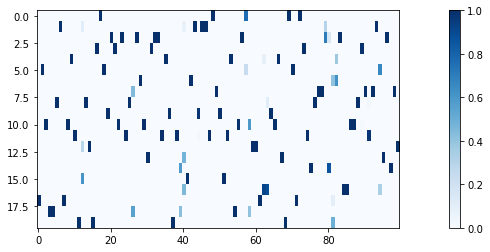

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 4))
plt.imshow(X, aspect=3, cmap="Blues")
plt.colorbar()
plt.show()

In [9]:
X.sum(0)

array([1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.001, 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 0.999, 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   ])

In [10]:
(X * t).sum(1)

array([25.885, 25.896, 25.882, 25.888, 25.887, 25.884, 25.886, 25.884,
       25.884, 25.885, 25.886, 25.884, 25.888, 25.875, 25.886, 25.891,
       25.882, 25.881, 25.88 , 25.89 ])